Vorbereitung:

In [2]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import time
import pandas as pd
import collections
import statistics
from scipy.interpolate import interp1d

saving_plots = False
#Für thom Sammlung:
# rc = np.array([0,1,2,4,10])

In [3]:
def m(val):
    return val.mean()

#liefert Datenwolke
def scatter_thom(thom):
    x = thom
    y = range(0, len(thom))
    area = np.pi*2

    # Plot
    fig, pl
    plt.scatter(x, y, s=area, alpha=0.7, color='seagreen')
    plt.xlabel('timesteps until homogeneity')
    plt.ylabel('number of run')
    plt.show()

#liefert Barcode:
def plot_thom_hist(thom, save=False):
    max = thom.max().astype(int)
#     print(max)
    counter=collections.Counter(thom.astype(int))
#     print(counter)
    val = np.zeros(max+1)
# #     print(counter.keys())
    for key in counter.keys():
#         print(key)
        val[key] = counter[key]

    fig, ax = plt.subplots()
    plt.xlim(0, max+1)
#     plt.ylim(0, val.max())
    plt.yticks(np.arange(0, val.max()+0.2, 1))
    ax.set(xlabel='t_hom', ylabel='absolute frequency')
    time = range(0,max+1)
    plt.bar(time, val, color='cyan', edgecolor='blue', width=0.5)
    plt.show()
    
#verteilung als barplot oder lineplot
def verteilung(thom, li, line=False):
    max = thom.max().astype(int)
    l = len(thom)
    #intervalllänge
#     li = 500
    #anz intervalle
    ni = (max / li + 1).astype(int) #
    count = np.zeros(ni+1)
    #     sort = np.sort(thom)

    for entry in thom:
        c = (entry / li).astype(int)
        count[c] += 1
    if count.sum() != l:
        print('FEHLER!')

    fig, ax = plt.subplots()
    x = np.arange(0, max + li, li)
#     print(x1, x2)
    y = count[(x/li).astype(int)]
#     y2 = count[(x2/li2).astype(int)]
    print('maximum ist bei', x[(y==y.max())]+li/2)
    if line:
        ax.plot(x+li/2, y, color='seagreen', linewidth=1)
    else:
        plt.bar(x+li/2, y, width=li, color='cyan', edgecolor='blue', alpha=0.5)
    # plt.bar(x2, y2, width=li2, color='cyan', edgecolor='blue', alpha = 0.5)
    plt.xlim(0, max + li)
    plt.ylim(0, y.max()+1)
    # # plt.xticks(np.arange(0, 2000)) 
    ax.set(xlabel='timesteps', ylabel='absolut')
    plt.show()

# if interpolate:
#             x_new = np.linspace(x.min() + li/2, x.max() + li/2)
#             f = interp1d(x+li/2, y, kind='nearest')
#             y_smooth=f(x_new)
#             plt.plot (x_new,y_smooth)
#             plt.scatter (x, y)    
    
#für später, liest verschiedene rc ein
# def plot_thom_rc(thom, save=False):
#     wdh, ver = thom.shape
#     print(wdh, ver)
#     up = np.zeros(ver)
#     mean = np.zeros(ver)
#     lo = np.zeros(ver)
    
#     for v in range(0,ver):
# #         print(v)
#         lo[v] = thom[:,v].min()
#         up[v] = thom[:,v].max()
#         mean[v] = thom[:,v].mean()
# #     print(lo, up, mean)
#     plt.xlim(0,rc.max())
#     data = pd.DataFrame({'x': rc, 'lower': lo, 'mean': mean, 'upper': up})
#     plt.plot( 'x', 'lower', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label='min')
#     plt.plot( 'x', 'mean', data=data, marker='o', markersize=7, color='seagreen', linewidth=2, label='mean')
#     plt.plot( 'x', 'upper', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label="max")
#     plt.legend()
#     #if save:

Daten einlesen:

In [5]:
#dims=1, rc=178
th01_1 = '18001_th500_1'
th01_2 = '18001_th500_2'
#dims=90, rc=0
th90_1 = '18090_th500_1'
th90_2 = '18090_th500_2'
#dims=45, rc=2
th45_1 = '18045_th500_1'
th45_2 = '18045_th500_2'
#dims=2, rc=88
th02_1 = '18002_th500_1'
th02_2 = '18002_th500_2'

thom01_1 = np.load('saved_data/' + th01_1 +'.npy')
thom01_2 = np.load('saved_data/' + th01_2 +'.npy')
thom90_1 = np.load('saved_data/' + th90_1 +'.npy')
thom90_2 = np.load('saved_data/' + th90_2 +'.npy')
thom45_1 = np.load('saved_data/' + th45_1 +'.npy')
thom45_2 = np.load('saved_data/' + th45_2 +'.npy')
thom02_1 = np.load('saved_data/' + th02_1 + '.npy')
thom02_2 = np.load('saved_data/' + th02_2 + '.npy')
# %matplotlib notebook
# thom = np.array([[1,2,3,3,5], [7,10,1,15,2]])
# t = np.array([1,10,7,6])




thom01 = np.append(thom01_1, thom01_2)
thom90 = np.append(thom90_1, thom90_2)
thom45 = np.append(thom45_1, thom45_2)
thom02 = np.append(thom02_1, thom02_2)
print(len(thom01), len(thom45), len(thom90), len(thom02))
print(m(thom01_1), m(thom01_2), m(thom90_1), m(thom90_2), m(thom45_1), m(thom45_2), m(thom02_1), m(thom02_2))


# ana_t(t)

1000 1000 1000 1000
9064.928 8488.35 7942.318 7948.064 8714.774 8767.01 8914.526 8630.602


<IPython.core.display.Javascript object>


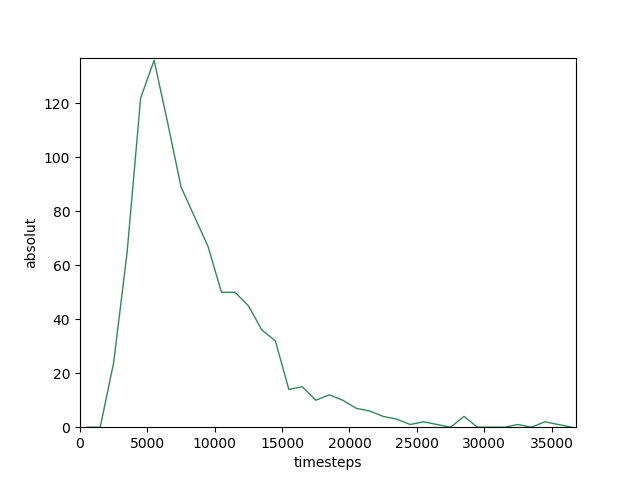

maximum ist bei [5500.]


In [6]:
%matplotlib notebook
# verteilung(thom02, 500, line=True)
verteilung(thom45, 1000, line=True)

weiteres:

maxx 32782.0
xrange [  500.  1500.  2500.  3500.  4500.  5500.  6500.  7500.  8500.  9500.
 10500. 11500. 12500. 13500. 14500. 15500. 16500. 17500. 18500. 19500.
 20500. 21500. 22500. 23500. 24500. 25500. 26500. 27500. 28500. 29500.
 30500. 31500. 32500. 33500.]
34
34


<IPython.core.display.Javascript object>


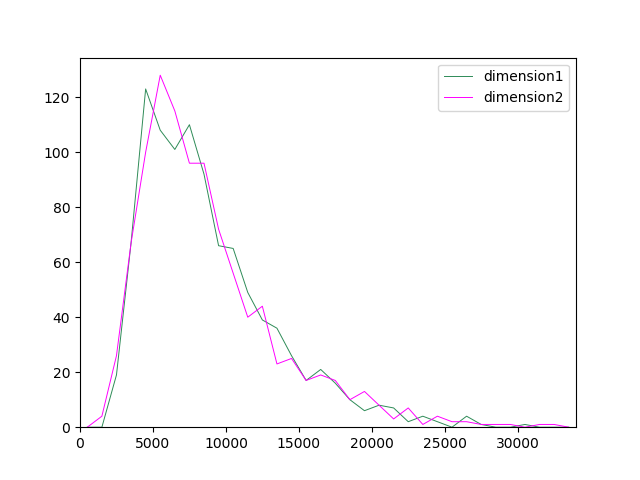

      range  dimension1  dimension2
0     500.0         0.0         0.0
1    1500.0         0.0         4.0
2    2500.0        19.0        26.0
3    3500.0        67.0        67.0
4    4500.0       123.0       100.0
5    5500.0       108.0       128.0
6    6500.0       101.0       115.0
7    7500.0       110.0        96.0
8    8500.0        92.0        96.0
9    9500.0        66.0        72.0
10  10500.0        65.0        56.0
11  11500.0        49.0        40.0
12  12500.0        39.0        44.0
13  13500.0        36.0        23.0
14  14500.0        26.0        25.0
15  15500.0        17.0        17.0
16  16500.0        21.0        19.0
17  17500.0        16.0        17.0
18  18500.0        10.0        10.0
19  19500.0         6.0        13.0
20  20500.0         8.0         8.0
21  21500.0         7.0         3.0
22  22500.0         2.0         7.0
23  23500.0         4.0         1.0
24  24500.0         2.0         4.0
25  25500.0         0.0         2.0
26  26500.0         4.0     

In [75]:
#alle in ein lineplot

def thom_all_plot(time_arrays, xrange):
    colors = ['seagreen', 'magenta', 'cyan']

#     var = {**{'x': x}, **time_arrays}
    fig, ax = plt.subplots()
    data = pd.DataFrame({**{'range': xrange}, **time_arrays})
    print(data)
    for index, (name, thom) in enumerate(time_arrays.items()):
#         print(index, name, thom[34])
        plt.plot( 'range', name, data=data, marker='', color=colors[index], linewidth=0.7, label=name)
    plt.legend()
    plt.xlim(0, xrange.max() + xrange[0])
    plt.ylim(bottom=0)
    plt.show()
        
        
#         data = pd.DataFrame({'x': rc, 'lower': lo, 'mean': mean, 'upper': up})
#     plt.plot( 'x', 'lower', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label='min')
#     plt.plot( 'x', 'mean', data=data, marker='o', markersize=7, color='seagreen', linewidth=2, label='mean')
#     plt.plot( 'x', 'upper', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label="max")
        
def create_c(li, thom): 
    max = thom.max().astype(int)
    l = len(thom)
    #anz intervalle
    ni = (max / li + 1).astype(int) #
    count = np.zeros(ni+1)

    for entry in thom:
        c = (entry / li).astype(int)
        count[c] += 1
    if count.sum() != l:
        print('FEHLER!')
    
    return count

def thom_all(time_array, li):
    maxx = max([x.max() for x in data.values()])
    print('maxx', maxx)
    x = np.arange(0, maxx + li, li) + li/2
    print('xrange', x)
    smoothie = {}
    for name, entry in data.items():
        c = create_c(li, entry)
        smoothie[name] = np.append(c, np.zeros(len(x) - len(c)))
        print(len(smoothie[name]))
#     smoothie = {**{'x': x}, **smoothie}
    thom_all_plot(smoothie, x) 

data = { 'dimension1': thom01, 'dimension2': thom02}

# print(maxx)
li = 1000

    
thom_all(data, li)    
    

#     x = np.arange(0, max + li, li)

#     print('maximum ist bei', x[(y==y.max())]+li/2)
#     if line:
#         ax.plot(x+li/2, y, color='seagreen', linewidth=1)
#     else:
#         plt.bar(x+li/2, y, width=li, color='cyan', edgecolor='blue', alpha=0.5)
#     # plt.bar(x2, y2, width=li2, color='cyan', edgecolor='blue', alpha = 0.5)
#     plt.xlim(0, max + li)
#     plt.ylim(0, y.max()+1)
#     # # plt.xticks(np.arange(0, 2000)) 
#     ax.set(xlabel='timesteps', ylabel='absolut')
#     plt.show()

# data = pd.DataFrame({'x': rc, 'lower': lo, 'mean': mean, 'upper': up})
#     plt.plot( 'x', 'lower', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label='min')
#     plt.plot( 'x', 'mean', data=data, marker='o', markersize=7, color='seagreen', linewidth=2, label='mean')
#     plt.plot( 'x', 'upper', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label="max")

In [33]:
array = ['a','z', 'b', 'c']
# for k, v in enumerate(array, start=1):
#     print(k, v)
max(array)

'z'